# __Introduction__

This notebook serves as a tutorial for using the `AGBBrta` class from the AGILE framework. The class applies Bayesian Blocks on two types of data:
* Binned Light Curve (`.ap`)
* Time Tagged Event (TTE, `.ph`)

It provides functionalities for selecting events, analyzing input and output data, and plotting results.

---

### __Importing Required Libraries__

Here, we import essential libraries such as pandas for handling data, numpy for numerical computations, and astropy.time for time-related operations.

In [ ]:
import os
import pandas as pd
import numpy as np
from astropy.time import Time

In [ ]:
from agilepy.api.AGBayesianBlocksRTA import AGBBrta

### __Defining File Paths__

* `csv_path_detections`: Path to the CSV file containing event detections.
* `file_path_bin`: Path to the binned light curve (.ap) file.
* `file_path_tte`: Path to the time-tagged event (TTE, .ph) file.
* `evtidagile`: ID of the event to be analyzed.

In [ ]:
csv_path_detections = os.path.join("short_graydetections.csv")
file_path_bin = os.path.join("ALL2023_7200s_emin100_emax10000_r2_DQ1.ap")
file_path_tte = os.path.join("ALL2023_7200s_emin100_emax10000_r2_DQ1.ap.ph")
evtidagile = "E05"

---

## __Binned Light Curve__

Creates an instance of AGBBrta, which will be used for event selection and Bayesian Blocks analysis.

In [4]:
agilebb = AGBBrta()

Two ways to select an event:
1. Using an event ID from a CSV file containing a list of events.
2. Manually specifying tstart and tstop to define a time range.

Here, we are selecting an event by defining a custom time range (`tstart=54935.0, tstop=54936.0`).

In [5]:
#290*7200 = exp -> 290 cm2 effective area, dt=7200
agilebb.select_event(ap_path=file_path_bin, 
                     #event_id=evtidagile, detections_csv_path=csv_path_detections, 
                     tstart=54935.0,tstop=54936.0,
                     rate=False)

Binned light AGILE AP curve selected 2...
Total number of rows for the event None (no zero-exposure): 12
Total number of photons for the event None (no zero-exposure): 61


Retrieves the pre-Bayesian Blocks input data for further analysis.

In [6]:
agilebb.get_data_in()

{'x': array([ 4,  4,  3,  6,  4,  4,  6,  4,  8, 10,  4,  4]),
 't': array([1.667556e+08, 1.667628e+08, 1.667700e+08, 1.667772e+08,
        1.667844e+08, 1.667916e+08, 1.667988e+08, 1.668060e+08,
        1.668132e+08, 1.668204e+08, 1.668276e+08, 1.668348e+08]),
 'sigma': array([2.        , 2.        , 1.73205081, 2.44948974, 2.        ,
        2.        , 2.44948974, 2.        , 2.82842712, 3.16227766,
        2.        , 2.        ]),
 'dt': 7200.0,
 'datamode': 2,
 't_delta': array([7200., 7200., 7200., 7200., 7200., 7200., 7200., 7200., 7200.,
        7200., 7200., 7200.]),
 'cts': array([ 4,  4,  3,  6,  4,  4,  6,  4,  8, 10,  4,  4]),
 'exp': array([1517683.85, 1515405.06,  925504.95, 1129249.07, 1655542.89,
        1309701.17, 1286156.51, 1698937.91, 2049507.15, 1857218.59,
        1396071.69, 1505461.97]),
 'data_cells': array([1.667520e+08, 1.667592e+08, 1.667664e+08, 1.667736e+08,
        1.667808e+08, 1.667880e+08, 1.667952e+08, 1.668024e+08,
        1.668096e+08, 1.668168e

Retrieves the post-Bayesian Blocks processed data. This allows comparison between raw and segmented data after applying the Bayesian Blocks algorithm.

In [7]:
agilebb.get_data_out()

{}

Generates a plot of the input data before applying Bayesian Blocks. This helps visualize the raw light curve or time-tagged events.

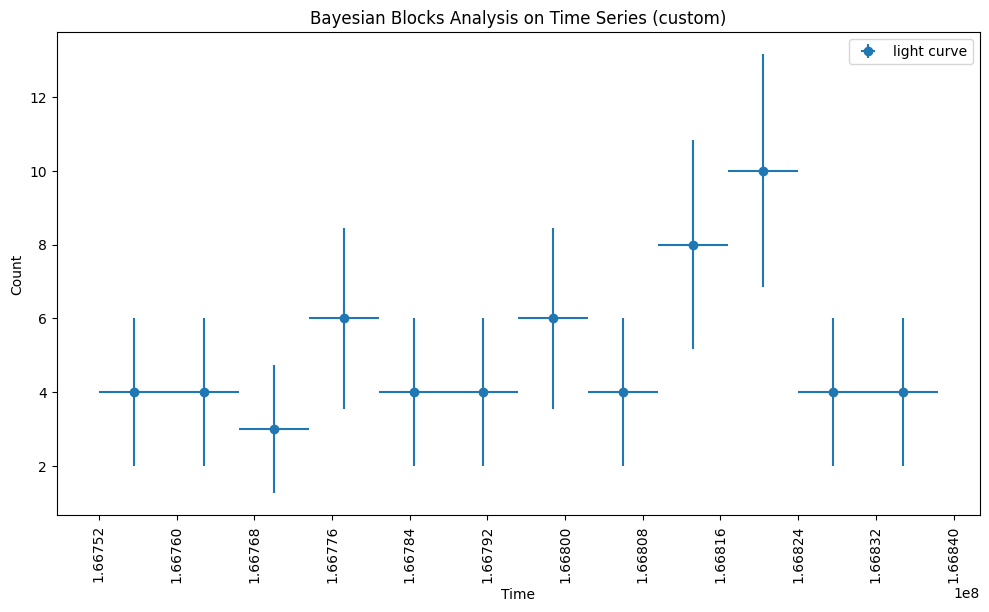

In [8]:
agilebb.plot_data(yerr=True)

Compute the Bayesian blocks using the given parameters and plot the result.

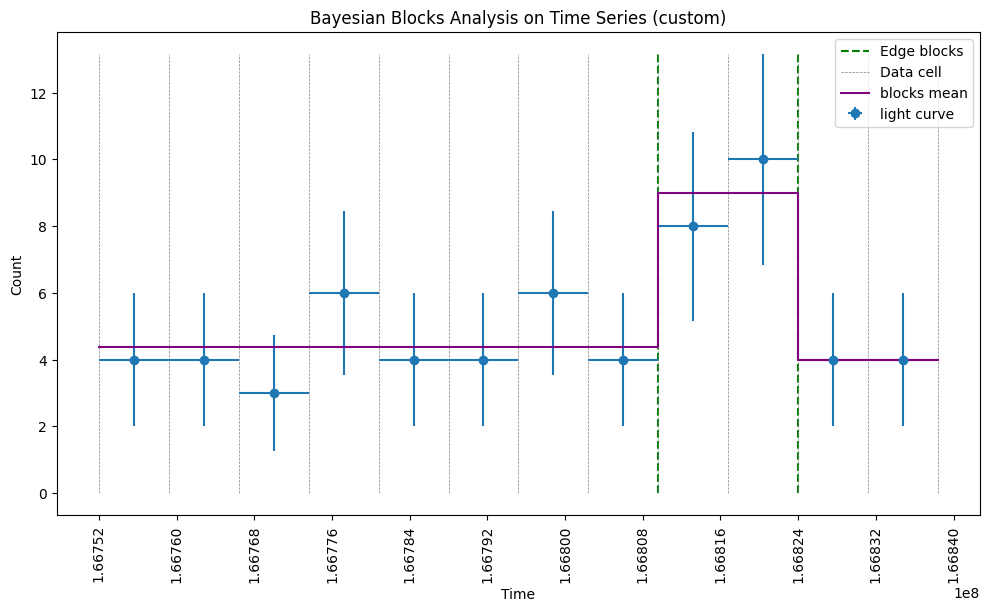

In [9]:
agilebb.bayesian_blocks(gamma=0.35, useerror=True)

In [10]:
agilebb.get_data_out()

{'data_cells': array([1.667520e+08, 1.667592e+08, 1.667664e+08, 1.667736e+08,
        1.667808e+08, 1.667880e+08, 1.667952e+08, 1.668024e+08,
        1.668096e+08, 1.668168e+08, 1.668240e+08, 1.668312e+08,
        1.668384e+08]),
 'ncp_prior': 1.0498221244986778,
 'N': 12,
 'change_points': [8, 10],
 'edge_points': array([1.668096e+08, 1.668240e+08]),
 'N_data_cells': 12,
 'N_change_points': 2,
 'edge_vec': array([1.668240e+08, 1.668312e+08, 1.668384e+08]),
 'sum_blocks': array([35., 18.,  8.]),
 'mean_blocks': array([4.375, 9.   , 4.   ]),
 'dt_event_vec': array([50400.,  7200.,  7200.]),
 'dt_block_vec': array([57600., 14400., 14400.]),
 'blockrate': array([0.00060764, 0.00125   , 0.00055556]),
 'blockrate2': array([3.28995304e-06, 4.64388663e-06, 2.76108705e-06]),
 'eventrate': array([0.00069444, 0.0025    , 0.00111111])}

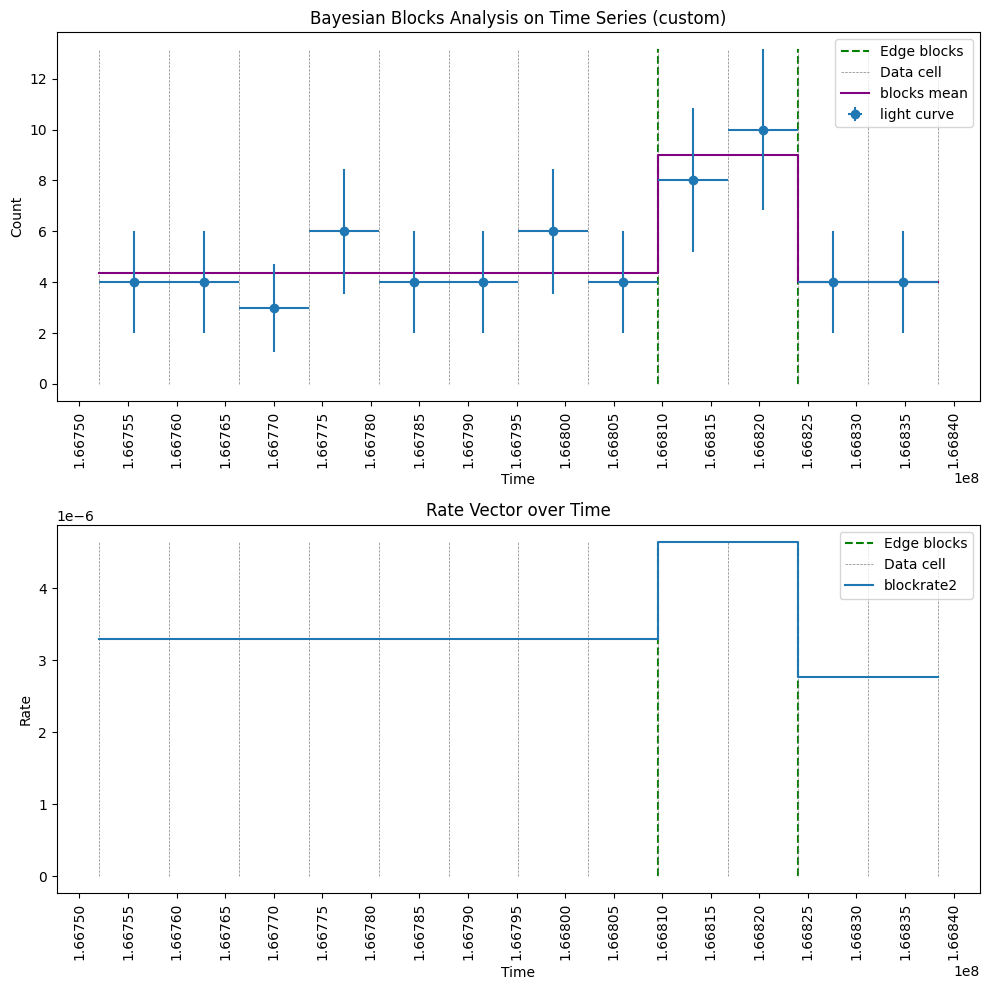

In [11]:
agilebb.plot_blocks_with_rate()

---

# __Time Tagged Event__

Similar for Binned Light Curve, but in this case we can use detection table instead of manually specifying the `tstart` and `tstop`.

In [12]:
detection_tab = pd.read_csv(csv_path_detections)
detection_tab.head()

,flare_id,mjd_start,mjd_stop
0,E01,54343.0,54344.0
1,E02,54732.0,54733.0
2,E03,54746.0,54747.0
3,E04,54915.0,54916.0
4,E05,54935.0,54936.0


In [13]:
agilebb = AGBBrta()

In [14]:
#290*7200 = exp -> 290 cm2 effective area, dt=7200
agilebb.select_event(
    ph_path=file_path_tte,
    detections_csv_path=csv_path_detections, event_id=evtidagile, 
    # tstart=54935.0,tstop=54936.0,
    rate=False)

TTE...
Number of photons in this event is: 61


In [15]:
agilebb.get_data_in()

{'x': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 't': array([1.66753427e+08, 1.66754655e+08, 1.66754690e+08, 1.66758531e+08,
        1.66759467e+08, 1.66760114e+08, 1.66760288e+08, 1.66766329e+08,
        1.66771041e+08, 1.66771352e+08, 1.66771957e+08, 1.66774699e+08,
        1.66776765e+08, 1.66776924e+08, 1.66777154e+08, 1.66777776e+08,
        1.66780365e+08, 1.66781370e+08, 1.66783343e+08, 1.66786559e+08,
        1.66787377e+08, 1.66792763e+08, 1.66792975e+08, 1.66793265e+08,
        1.66793455e+08, 1.66798191e+08, 1.66799368e+08, 1.66799598e+08,
        1.66800224e+08, 1.66800390e+08, 1.66800418e+08, 1.66803406e+08,
        1.66803484e+08, 1.66803607e+08, 1.66805060e+08, 1.66810097e+08,
        1.66810643e+08, 1.66811171e+08, 1.66811257e+08, 1.668113

In [16]:
agilebb.get_data_out()

{}

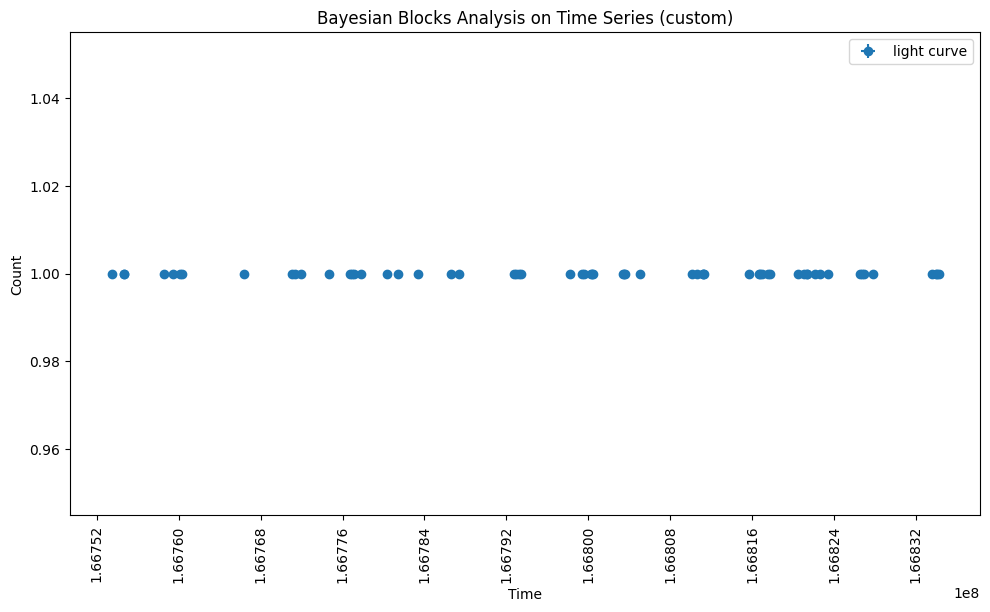

In [17]:
agilebb.plot_data(yerr=False)

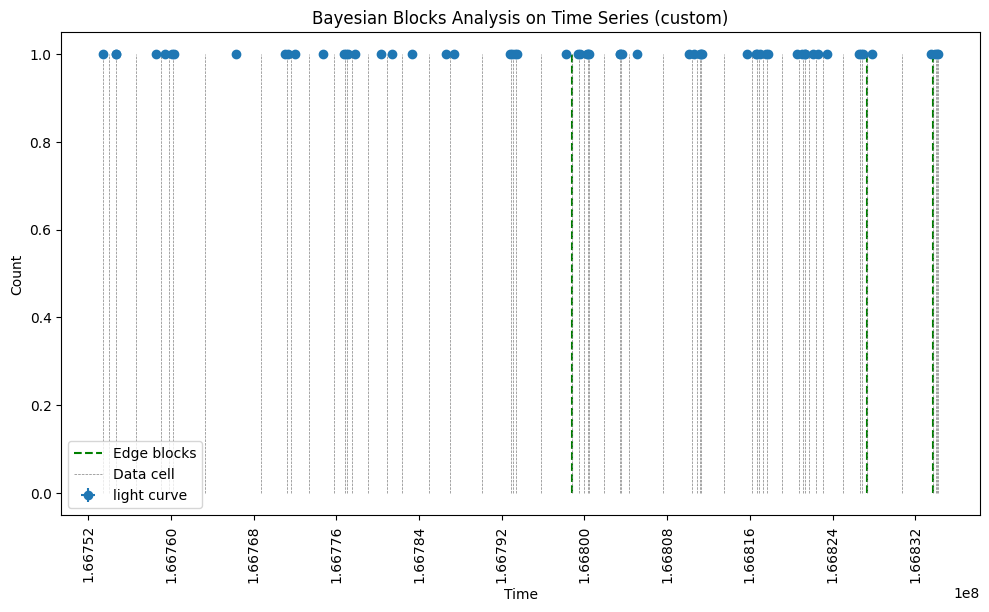

In [18]:
agilebb.bayesian_blocks(p0=1.2)

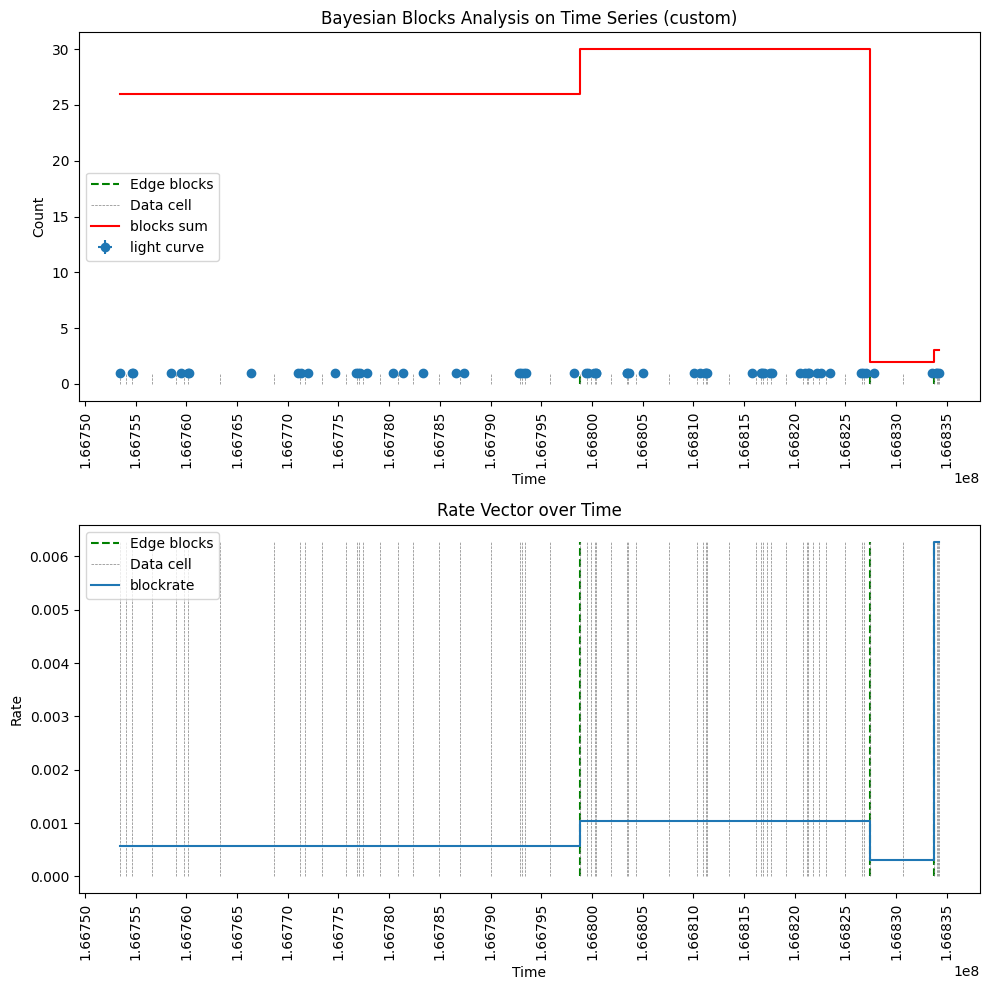

In [19]:
agilebb.plot_blocks_with_rate()